# <font color='blue'>Data Science Academy</font>
# <font color='blue'>Análise Estatística Para Data Science com Linguagem Python</font>

## <font color='blue'>Lab 1</font>
## <font color='blue'>Aplicando a Teoria da Aprendizagem Estatística Para Previsão de Vendas</font>

![title](imagens/Lab1.png)

## Pré-Requisitos

Recomendamos que você tenha concluído pelo menos os 5 primeiros capítulos do curso gratuito de <a href="https://www.datascienceacademy.com.br/course?courseid=python-fundamentos">Python Fundamentos Para Análise de Dados</a>.

## Podemos dividir o Processo de Ciência de Dados nas seguintes etapas:

### Etapa 1 - Definição do Problema

Aqui definimos o problema de negócio a ser resolvido. Leia o manual em pdf no Capítulo 2 do curso.

### Etapa 2 - Carga e Compreensão Geral dos Dados

Aqui procuramos obter uma visão geral dos dados e se realmente podem ser usados para resolver o problema de negócio. Dependendo da fonte de dados pode ser necessário envolver um Engenheiro de Dados no processo.

### Etapa 3 - Análise Exploratória

Nesta etapa vamos explorar os dados e compreender como estão organizados com a ajuda da Estatística.

### Etapa 4: Pré-Processamento dos Dados

Nesta etapa vamos reorganizar os dados e prepará-los para a modelagem. A Estatística mais uma vez será usada.

### Etapa 5: Modelagem

Aqui construímos, testamos e avaliamos diferentes modelos. A modelagem pode ser estatística (quando estamos mais interessados em commpreender o relacionamento entre os dados) ou preditiva (quando estamos mais interessados em fazer previsões). Para este Lab vamos trabalhar com modelagem preditiva e criaremos diferentes modelos, sendo cada modelo com sua própria abordagem de cálculos e estatísticas. Tanto a modelagem estatística quanto a modelagem preditiva empregam Estatística.

### Etapa 6: Deploy do Modelo

Aqui usamos o modelo final com novos dados para então resolver o problema para o qual ele foi criado.

> Vamos então ao trabalho. Para a Etapa 1 leia o manual em pdf no Capítulo 2 do curso.

## Instalando e Carregando os Pacotes

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.18


In [2]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# !pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
#!pip install -q -U watermark

In [3]:
# Este pacote não vem com o Anaconda e precisa ser instalado
#!pip install -q xgboost

In [4]:
# Imports
import pickle
import pandas as pd
import numpy as np
import xgboost as xgb
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set(style = "whitegrid")
%matplotlib inline

In [5]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

Author: Data Science Academy

pandas    : 2.1.4
numpy     : 1.26.3
seaborn   : 0.13.2
matplotlib: 3.8.2
sklearn   : 1.3.2
xgboost   : 2.0.3



### Etapa 2 - Carga e Compreensão Geral dos Dados

Vamos ter uma compreensão geral dos dados.

In [6]:
# Carregando os dados
dataset = pd.read_csv("dados/dados_originais.csv")

In [7]:
# Shape
dataset.shape

(11500, 180)

In [8]:
# Visualizando alguns registros
dataset.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [9]:
# Categorias da variável alvo
dataset.y.value_counts()

y
4    2300
1    2300
5    2300
2    2300
3    2300
Name: count, dtype: int64

Vamos criar uma coluna chamada LABEL_VARIAVEL_TARGET em que 1 vai representar que o cliente comprou a extensão do seguro e 0 vai representar que o cliente não comprou a extensão do seguro.

Desta forma, transformamos a questão de negócio em um problema de classificação, cujo objetivo será prever se um cliente vai ou não comprar a extensão do seguro.

In [10]:
# Colocando True onde o valor for igual a 1 e False onde o valor for diferente.
dataset['LABEL_VARIAVEL_TARGET'] = dataset.y == 1

In [11]:
# Visualizando alguns registros
dataset.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X171,X172,X173,X174,X175,X176,X177,X178,y,LABEL_VARIAVEL_TARGET
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-15,-31,-77,-103,-127,-116,-83,-51,4,False
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,150,146,152,157,156,154,143,129,1,True
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,64,48,19,-12,-30,-35,-35,-36,5,False
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-81,-80,-77,-85,-77,-72,-69,-65,5,False
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,2,-12,-32,-41,-65,-83,-89,-73,5,False


In [12]:
# Converte de string para valor numérico
dataset['LABEL_VARIAVEL_TARGET'] = dataset['LABEL_VARIAVEL_TARGET'].astype(int)

In [13]:
# Visualizando alguns registros
dataset.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X171,X172,X173,X174,X175,X176,X177,X178,y,LABEL_VARIAVEL_TARGET
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-15,-31,-77,-103,-127,-116,-83,-51,4,0
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,150,146,152,157,156,154,143,129,1,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,64,48,19,-12,-30,-35,-35,-36,5,0
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-81,-80,-77,-85,-77,-72,-69,-65,5,0
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,2,-12,-32,-41,-65,-83,-89,-73,5,0


In [14]:
# A coluna original (y) será eliminada, pois era uma variável categórica com 5 status diferentes. 
# Desde então, convertemos a variável em uma variável numérica binária chamada LABEL_VARIAVEL_TARGET.
dataset.pop('y')

0        4
1        1
2        5
3        5
4        5
        ..
11495    2
11496    1
11497    5
11498    3
11499    4
Name: y, Length: 11500, dtype: int64

In [15]:
# Visualizando alguns registros
dataset.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,LABEL_VARIAVEL_TARGET
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,0


In [16]:
# A primeira coluna será descartada devido à sua inutilidade em nosso modelo de aprendizado de máquina,
# pois parece representar um ID.
dataset.drop(dataset.columns[0], axis=1, inplace=True)

In [17]:
# Visualizando alguns registros
dataset.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,LABEL_VARIAVEL_TARGET
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,0


In [18]:
print("Número de colunas: ", len(dataset.columns))

Número de colunas:  179


Temos 178 variáveis de entrada e 1 variável de saída.

### Etapa 3 - Análise Exploratória

Vamos explorar os dados.

#### 3.1: Resumo Estatístico dos Dados

In [19]:
# Resumo estatístico
dataset.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,LABEL_VARIAVEL_TARGET
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,...,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,0.200000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,...,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,0.400017
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,...,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000,0.000000
25%,-54.000000,-55.000000,-54.000000,-54.000000,-54.000000,-54.000000,-54.000000,-55.00000,-55.00000,-54.000000,...,-55.000000,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000,0.000000
50%,-8.000000,-8.000000,-7.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.00000,-7.00000,-7.000000,...,-9.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000,0.000000
75%,34.000000,35.000000,36.000000,36.000000,35.000000,36.000000,35.000000,36.00000,36.00000,35.250000,...,34.000000,34.000000,33.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000,0.000000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.00000,2047.00000,2047.000000,...,1777.000000,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000,1.000000


In [20]:
# Verificando se há valores ausentes
dataset.isnull().values.any()

False

In [21]:
# Extrai a lista de colunas
lista_de_colunas = dataset.columns.tolist()

In [22]:
# Colunas das variáveis de entrada (input)
colunas_entrada = lista_de_colunas[0:178]

In [23]:
print(colunas_entrada)

['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X72', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X93', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X107', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X121', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', 'X131', 'X132', 'X133', 'X134', 'X135', 'X136', 'X137', 'X138', 'X1

In [24]:
# Checando se temos colunas duplicadas nos dados de entrada
dup_cols = set([x for x in colunas_entrada if colunas_entrada.count(x) > 1])
print(dup_cols)
assert len(dup_cols) == 0, "You duplicated columns in cols input"

set()


In [25]:
# Checando se temos colunas duplicadas no dataset completo
dup_cols = set([x for x in lista_de_colunas if lista_de_colunas.count(x) > 1])
print(dup_cols)
assert len(dup_cols) == 0, "You duplicated columns in lista_de_colunas"

set()


#### 3.2: Prevalência de Classe

In [26]:
# Categorias da variável alvo
dataset.LABEL_VARIAVEL_TARGET.value_counts()

LABEL_VARIAVEL_TARGET
0    9200
1    2300
Name: count, dtype: int64

A prevalência é a porcentagem de suas amostras que tem a característica que você está tentando prever. Nesse cenário específico, significa que as pessoas que compraram a extensão do seguro são positivas, enquanto as que não compraram são negativas. 

A taxa é calculada por (número de amostras positivas / número de amostras). Portanto, uma taxa de prevalência de 0,2 significa que 20% de nossa amostra comprou a extensão do seguro.

In [27]:
# Esta função calcula a prevalência da classe positiva (label = 1)
def calcula_prevalencia(y_actual):
    return sum(y_actual) / len(y_actual)

In [28]:
print("Prêvalencia da classe positiva: %.3f"% calcula_prevalencia(dataset["LABEL_VARIAVEL_TARGET"].values))

Prêvalencia da classe positiva: 0.200


> O desbalanceamento de classe é um problema que terá que ser resolvido durante o pré-processamento dos dados.

### Etapa 4: Pré-Processamento dos Dados

#### 4.1: Divisão dos Dados em Treino, Validação e Teste

Geralmente, podemos dividir o conjunto de dados em 50/25/25, 60/20/20, 70/15/15 como a divisão para amostras de treinamento / validação / teste; isso também depende de quantas amostras temos. Se tivermos um conjunto de dados extremamente grande (centenas de milhões de linhas), podemos usar uma divisão como 98/1/1. 

A divisão de treinamento é usada para treinar nosso algoritmo de aprendizagem, por isso queremos usar a maioria de nosso conjunto de dados. 

O conjunto de dados de validação é usado para ajustar os hiperparâmetros e selecionar a abordagem de melhor desempenho durante o treinamento. Ou seja, usamos dados de validação para testar o modelo durante o treinamento.

O conjunto de dados de teste é usado para testar a precisão do nosso modelo de aprendizagem. Ou seja, usamos dados de tete para testar o modelo após o treinamento.

In [29]:
# Gerando amostras aleatórias dos dados
df_data = dataset.sample(n = len(dataset))

In [30]:
# Ajustando os índices do dataset
df_data = df_data.reset_index(drop = True)

In [31]:
# Gera um índice para a divisão
df_valid_teste = df_data.sample(frac = 0.3)
print("Tamanho da divisão de validação / teste: %.1f" % (len(df_valid_teste) / len(df_data)))

Tamanho da divisão de validação / teste: 0.3


In [32]:
# Fazendo a divisão

# Dados de teste
df_teste = df_valid_teste.sample(frac = 0.5)

# Dados se validação
df_valid = df_valid_teste.drop(df_teste.index)

# Dados de treino
df_treino = df_data.drop(df_valid_teste.index)

In [33]:
# Verifique a prevalência de cada subconjunto
print(
    "Teste(n = %d): %.3f"
    % (len(df_teste), calcula_prevalencia(df_teste.LABEL_VARIAVEL_TARGET.values))
)

print(
    "Validação(n = %d): %.3f"
    % (len(df_valid), calcula_prevalencia(df_valid.LABEL_VARIAVEL_TARGET.values))
)

print(
    "Treino(n = %d): %.3f"
    % (len(df_treino), calcula_prevalencia(df_treino.LABEL_VARIAVEL_TARGET.values))
)



Teste(n = 1725): 0.199
Validação(n = 1725): 0.206
Treino(n = 8050): 0.199


In [34]:
print('Todas as amostras (n = %d)'%len(df_data))
assert len(df_data) == (len(df_teste)+len(df_valid)+len(df_treino)), 'Something is wrong'

Todas as amostras (n = 11500)


#### 4.2: Balanceamento de Classe

Queremos equilibrar nosso conjunto de dados para evitar a criação de um modelo em que ele classifique incorretamente as amostras como pertencentes à classe majoritária. 

Por exemplo, se tivermos um conjunto de dados de detecção de fraude e a maioria dos casos for "Não é fraude", o modelo de classificação binária tenderia a favorecer a classe "Não é fraude", o que leva a resultados enganosos.

Equilibramos nosso conjunto de dados para que as proporções de cada classe sejam as mesmas para evitar a criação de um modelo ineficiente.

Como temos 2300 amostras positivas, podemos usar o método de balanceamento de subamostras (undersampling) para usar apenas um subconjunto aleatório das amostras negativas.

In [35]:
df_teste.shape

(1725, 179)

In [36]:
df_valid.shape

(1725, 179)

In [37]:
df_treino.shape

(8050, 179)

In [38]:
df_treino.LABEL_VARIAVEL_TARGET.value_counts()

LABEL_VARIAVEL_TARGET
0    6448
1    1602
Name: count, dtype: int64

> Vamos aplicar a técnica de Undersampling e remover registros da classe majoritária. 

Obs: Outra alternativa seria aplicar Oversampling e criar registros sintéticos para a classe minoritária.

In [39]:
# Cria um índice com True/False
indice = df_treino.LABEL_VARIAVEL_TARGET == 1

In [40]:
indice

0        False
1        False
3        False
4         True
5        False
         ...  
11490    False
11492     True
11493    False
11494    False
11496    False
Name: LABEL_VARIAVEL_TARGET, Length: 8050, dtype: bool

In [41]:
# Define valores positivos e negativos do índice
df_train_pos = df_treino.loc[indice]
df_train_neg = df_treino.loc[~indice]

In [42]:
# Valor mínimo de registros entre classe positiva e negativa
valor_minimo = np.min([len(df_train_pos), len(df_train_neg)])

In [43]:
valor_minimo

1602

In [44]:
# Obtém valores aleatórios para o dataset de treino
df_treino_final = pd.concat([df_train_pos.sample(n = valor_minimo, random_state = 69),
                             df_train_neg.sample(n = valor_minimo, random_state = 69)],
                            axis = 0,
                            ignore_index = True)

In [45]:
# Amostragem aleatória do dataset de treino
df_treino_final = df_treino_final.sample(n = len(df_treino_final), random_state = 69).reset_index(drop = True)

In [46]:
df_treino_final.shape

(3204, 179)

In [47]:
df_treino_final.LABEL_VARIAVEL_TARGET.value_counts()

LABEL_VARIAVEL_TARGET
0    1602
1    1602
Name: count, dtype: int64

In [48]:
# Balanceamento do conjunto de dados
print('Balanceamento em Treino(n = %d): %.3f'%(len(df_treino_final),
                                              calcula_prevalencia(df_treino_final.LABEL_VARIAVEL_TARGET.values)))

Balanceamento em Treino(n = 3204): 0.500


> Vamos salvar os datasets criados até aqui.

In [49]:
# Salvamos todos os datasets em disco no formato csv.
df_treino.to_csv('dados/dados_treino.csv', index = False)
df_treino_final.to_csv('dados/dados_treino_final.csv', index = False)
df_valid.to_csv('dados/dados_valid.csv', index = False)
df_teste.to_csv('dados/dados_teste.csv', index = False)

In [50]:
# Salvamos os dados de entrada (colunas preditoras) para facilitar a utilização mais tarde
pickle.dump(colunas_entrada, open('dados/colunas_entrada.sav', 'wb'))

> Criamos então as matrizes para o treinamento dos modelos.

In [51]:
# Cria as matrizes X e Y

# X
X_treino = df_treino_final[colunas_entrada].values
X_valid = df_valid[colunas_entrada].values
X_teste = df_teste[colunas_entrada].values

# Y
y_treino = df_treino_final['LABEL_VARIAVEL_TARGET'].values
y_valid = df_valid['LABEL_VARIAVEL_TARGET'].values
y_teste = df_teste['LABEL_VARIAVEL_TARGET'].values

# Print
print('Shape dos dados de treino:', X_treino.shape, y_treino.shape)
print('Shape dos dados de validação', X_valid.shape, y_valid.shape)
print('Shape dos dados de teste:', X_teste.shape, y_teste.shape)

Shape dos dados de treino: (3204, 178) (3204,)
Shape dos dados de validação (1725, 178) (1725,)
Shape dos dados de teste: (1725, 178) (1725,)


In [52]:
type(X_treino)

numpy.ndarray

In [53]:
X_treino

array([[   6,    6,    7, ...,   37,   45,   43],
       [  72,   75,   77, ...,   66,   70,   72],
       [  87,   55,   20, ...,  -10,  -28,  -18],
       ...,
       [-100,  -98,  -85, ...,    7,   10,    7],
       [  58,   64,   59, ...,  -31,  -30,  -20],
       [ -31,  -37,  -46, ...,   -7,   12,   24]])

#### 4.3: Padronização dos Dados

In [54]:
# Prepara o objeto para normalizar os dados

# Crio o objeto
scaler = StandardScaler()

# Faço o fit
scaler.fit(X_treino)

# Salva o objeto em disco e carrega para usamos adiante
scalerfile = 'dados/scaler.sav'

# Carrega o scaler (padronizador)
pickle.dump(scaler, open(scalerfile, 'wb'))
scaler = pickle.load(open(scalerfile, 'rb'))

# Aplica a padronização em nossas matrizes de dados
X_treino_tf = scaler.transform(X_treino)
X_valid_tf = scaler.transform(X_valid)

In [55]:
X_treino_tf

array([[ 0.07616799,  0.06726129,  0.06625038, ...,  0.23865933,
         0.27128589,  0.25529529],
       [ 0.34482939,  0.3479782 ,  0.3554808 , ...,  0.35940481,
         0.37513991,  0.37355151],
       [ 0.4058888 ,  0.26661098,  0.1199646 , ...,  0.04296837,
        -0.03196785,  0.00654943],
       ...,
       [-0.3553185 , -0.35584827, -0.31388103, ...,  0.11375021,
         0.12589026,  0.10849445],
       [ 0.28784061,  0.30322623,  0.28110726, ..., -0.04446801,
        -0.04027617, -0.00160618],
       [-0.07444522, -0.10767824, -0.15273837, ...,  0.05545928,
         0.13419858,  0.17781707]])

> Os dados estão pré-processados. Vamos para a etapa de modelagem.

### Etapa 5: Modelagem

#### 5.1: Funções Auxiliares

In [56]:
# Função para calcular a especificidade
def calc_specificity(y_actual, y_pred, thresh):
    return sum((y_pred < thresh) & (y_actual == 0)) / sum(y_actual == 0)

In [57]:
# Função para gerar relatório de métricas
def print_report(y_actual, y_pred, thresh):
    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    
    print('AUC:%.3f'%auc)
    print('Accuracy:%.3f'%accuracy)
    print('Recall:%.3f'%recall)
    print('Precision:%.3f'%precision)
    print('Specificity:%.3f'%specificity)
    print(' ')
    return auc, accuracy, recall, precision, specificity

Como equilibramos nossos dados de treinamento, vamos definir nosso limite em 0,5 para rotular uma amostra prevista como positiva. Isso vai permitir converter a previsão de probabilidade para uma previsão de classe.

In [58]:
thresh = 0.5

#### 5.2: Modelo 1 - Regressão Logística (Sem Otimização de Hiperparâmetros)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

A regressão logística é um tipo de modelo linear generalizado, que é uma generalização dos conceitos e habilidades dos modelos lineares regulares.

A regressão logística utiliza seus recursos de entrada e executa uma função linear projetando os pontos de amostra na linha. A função linear é executada somando o log de probabilidade de cada ponto de amostra e produz uma linha de regressão logística mais adequada maximizando o log de probabilidade, que é o mesmo que maximizar a probabilidade. A função de melhor ajuste preveria a probabilidade da classe positiva muito próxima de 1 (100%) e a classe negativa muito próxima de 0, em um modelo de classificação binária.

No entanto, maximizar a função de custo levará a sobreajuste da própria função, portanto penalizamos a função executando L1, L2 ou regularização elastic net. Por fim, a descida do gradiente é realizada para minimizar a função de custo com regularização.

Observe que a regressão logística produz a probabilidade de uma classe; portanto, para transformar isso em um modelo de classificação binária, precisamos definir um limite para a probabilidade da classe positiva. Por exemplo, se p (masculino) > 0,5, classifique-o como masculino.

In [59]:
# Construção do modelo

# Cria o classificador (objeto)
lr1 = LogisticRegression()

# Treina e cria o modelo
modelo_v1 = lr1.fit(X_treino_tf, y_treino)

# Previsões 
y_train_preds = modelo_v1.predict_proba(X_treino_tf)[:,1]
y_valid_preds = modelo_v1.predict_proba(X_valid_tf)[:,1]

print('Modelo de Regressão Logística (Sem Otimização de Hiperparâmetros)\n')

print('Treinamento:\n')
lr1_train_auc, lr1_train_accuracy, lr1_train_recall, lr1_train_precision, lr1_train_specificity = print_report(y_treino,
                                                                                                               y_train_preds,
                                                                                                               thresh)

print('Validação:\n')
lr1_valid_auc, lr1_valid_accuracy, lr1_valid_recall, lr1_valid_precision, lr1_valid_specificity = print_report(y_valid,
                                                                                                               y_valid_preds,
                                                                                                               thresh)


Modelo de Regressão Logística (Sem Otimização de Hiperparâmetros)

Treinamento:

AUC:0.631
Accuracy:0.661
Recall:0.532
Precision:0.717
Specificity:0.790
 
Validação:

AUC:0.529
Accuracy:0.692
Recall:0.454
Precision:0.323
Specificity:0.754
 


#### 5.3: Modelo 2 - Regressão Logística (Com Otimização de Hiperparâmetros)

In [60]:
# Construção do modelo

# Cria o classificador (objeto)
lr2 = LogisticRegression(random_state = 14, solver = 'liblinear')

# Treina e cria o modelo
modelo_v2 = lr2.fit(X_treino_tf, y_treino)

# Previsões 
y_train_preds = modelo_v2.predict_proba(X_treino_tf)[:,1]
y_valid_preds = modelo_v2.predict_proba(X_valid_tf)[:,1]

print('Modelo de Regressão Logístiva (Com Otimização de Hiperparâmetros)\n')

print('Treinamento:\n')
lr2_train_auc, lr2_train_accuracy, lr2_train_recall, lr2_train_precision, lr2_train_specificity = print_report(y_treino,
                                                                                                               y_train_preds,
                                                                                                               thresh)

print('Validação:\n')
lr2_valid_auc, lr2_valid_accuracy, lr2_valid_recall, lr2_valid_precision, lr2_valid_specificity = print_report(y_valid,
                                                                                                               y_valid_preds,
                                                                                                               thresh)




Modelo de Regressão Logístiva (Com Otimização de Hiperparâmetros)

Treinamento:

AUC:0.634
Accuracy:0.665
Recall:0.530
Precision:0.726
Specificity:0.800
 
Validação:

AUC:0.529
Accuracy:0.696
Recall:0.448
Precision:0.326
Specificity:0.761
 


#### 5.4: Modelo 3 - Naive Bayes

https://scikit-learn.org/stable/modules/naive_bayes.html

O classificador Naive Bayes usa o teorema de Bayes para realizar a classificação. Ele pressupõe que, se todos os recursos não estiverem relacionados, a probabilidade de vê-los juntos é apenas o produto da probabilidade de cada recurso acontecer.

Ele encontra a probabilidade de cada recurso dado a cada classe. Por exemplo, se um de nossos recursos é a previsão do tempo e a variável dependente é se jogaremos ou não golfe, encontraremos a probabilidade de cada categoria de previsão do tempo, uma vez que jogamos e não jogamos.

Usando esses resultados e multiplicamos todos eles juntos. Isso nos dá um valor que representa a probabilidade de X, dada uma classe vezes a probabilidade de uma classe. P(X|C) P(C). Fazemos isso para ambas as classes, depois dividimos os dois lados por P(X) para normalizar.

Por fim, para determinar se classificaremos ou não uma amostra no cenário X, comparamos a probabilidade normalizada do cenário X, dada sua classe, a amostra será classificada na classe que tem uma probabilidade maior.

In [64]:
# Construção do modelo

# Cria o classificador (objeto)
nb = GaussianNB()

# Treina e cria o modelo
modelo_v3 = nb.fit(X_treino_tf, y_treino)

# Previsões
y_train_preds = modelo_v3.predict_proba(X_treino_tf)[:,1]
y_valid_preds = modelo_v3.predict_proba(X_valid_tf)[:,1]

print('Modelo Naive Bayes:\n')

print('Treinamento:\n')
nb_train_auc, nb_train_accuracy, nb_train_recall, nb_train_precision, nb_train_specificity = print_report(y_treino,
                                                                                                          y_train_preds,
                                                                                                          thresh)

print('Validação:\n')
nb_valid_auc, nb_valid_accuracy, nb_valid_recall, nb_valid_precision, nb_valid_specificity = print_report(y_valid,
                                                                                                          y_valid_preds,
                                                                                                          thresh)

Modelo Naive Bayes:

Treinamento:

AUC:0.983
Accuracy:0.935
Recall:0.900
Precision:0.968
Specificity:0.971
 
Validação:

AUC:0.979
Accuracy:0.950
Recall:0.904
Precision:0.861
Specificity:0.962
 


#### 5.5: Modelo 4 - XGBoost (Xtreme Gradient Boosting Classifier)

https://xgboost.readthedocs.io/en/stable/index.html

XGBoost é um modelo de método ensemble que cria várias árvores de decisão e processa de forma paralela, sendo muito poderoso e preciso. É um modelo sofisticado.

Parâmetro de randomização extra é usado para reduzir a correlação entre árvores.

In [65]:
# Construção do modelo

# Cria o classificador
xgbc = XGBClassifier()

# Treina e cria o modelo
modelo_v4 = xgbc.fit(X_treino_tf, y_treino)

# Previsões
y_train_preds = modelo_v4.predict_proba(X_treino_tf)[:,1]
y_valid_preds = modelo_v4.predict_proba(X_valid_tf)[:,1]

print('Modelo Xtreme Gradient Boosting Classifier:\n')

print('Treinamento:\n')
xgbc_train_auc, xgbc_train_accuracy, xgbc_train_recall, xgbc_train_precision, xgbc_train_specificity = print_report(y_treino,
                                                                                                                    y_train_preds,
                                                                                                                    thresh)

print('Validação:\n')
xgbc_valid_auc, xgbc_valid_accuracy, xgbc_valid_recall, xgbc_valid_precision, xgbc_valid_specificity = print_report(y_valid,
                                                                                                                    y_valid_preds,
                                                                                                                    thresh)


Modelo Xtreme Gradient Boosting Classifier:

Treinamento:

AUC:1.000
Accuracy:1.000
Recall:1.000
Precision:1.000
Specificity:1.000
 
Validação:

AUC:0.991
Accuracy:0.958
Recall:0.935
Precision:0.869
Specificity:0.964
 


#### 5.6: Teste, Avaliação e Interpretação dos Modelos

Vamos criar um dataframe com esses resultados e plotar os resultados usando o seaborn.

In [66]:
# Tabela de resultados
df_results = pd.DataFrame({'classificador':['RL1', 'RL1', 'RL2', 'RL2', 'NB', 'NB', 'XGB', 'XGB'],
                           'data_set':['treino','validação'] * 4,
                           'auc':[lr1_train_auc,
                                  lr1_valid_auc,
                                  lr2_train_auc,
                                  lr2_valid_auc,
                                  nb_train_auc,
                                  nb_valid_auc,
                                  xgbc_train_auc,
                                  xgbc_valid_auc],
                           'accuracy':[lr1_train_accuracy,
                                       lr1_valid_accuracy,
                                       lr2_train_accuracy,
                                       lr2_valid_accuracy,
                                       nb_train_accuracy,
                                       nb_valid_accuracy,
                                       xgbc_train_accuracy,
                                       xgbc_valid_accuracy],
                           'recall':[lr1_train_recall,
                                     lr1_valid_recall,
                                     lr2_train_recall,
                                     lr2_valid_recall,
                                     nb_train_recall,
                                     nb_valid_recall,
                                     xgbc_train_recall,
                                     xgbc_valid_recall],
                           'precision':[lr1_train_precision,
                                        lr1_valid_precision,
                                        lr2_train_precision,
                                        lr2_valid_precision,
                                        nb_train_precision,
                                        nb_valid_precision,
                                        xgbc_train_precision,
                                        xgbc_valid_precision],
                           'specificity':[lr1_train_specificity,
                                          lr1_valid_specificity,
                                          lr2_train_specificity,
                                          lr2_valid_specificity,
                                          nb_train_specificity,
                                          nb_valid_specificity,
                                          xgbc_train_specificity,
                                          xgbc_valid_specificity]})

In [67]:
# Resultado
df_results


,classificador,data_set,auc,accuracy,recall,precision,specificity
0,RL1,treino,0.630879,0.661049,0.531835,0.717172,0.790262
1,RL1,validação,0.528780,0.692174,0.453521,0.323293,0.754015
2,RL2,treino,0.634487,0.664794,0.529963,0.725641,0.799625
3,RL2,validação,0.529098,0.696232,0.447887,0.326489,0.760584
4,NB,treino,0.983161,0.935393,0.900125,0.968435,0.970662
5,NB,validação,0.978602,0.950145,0.904225,0.860590,0.962044
6,XGB,treino,1.000000,1.000000,1.000000,1.000000,1.000000
7,XGB,validação,0.991286,0.957681,0.935211,0.869110,0.963504


A métrica de desempenho escolhida será a pontuação AUC (AUC Score) do conjunto de validação. É a pontuação mais comum usada para comparar modelos de algoritmos diferentes.

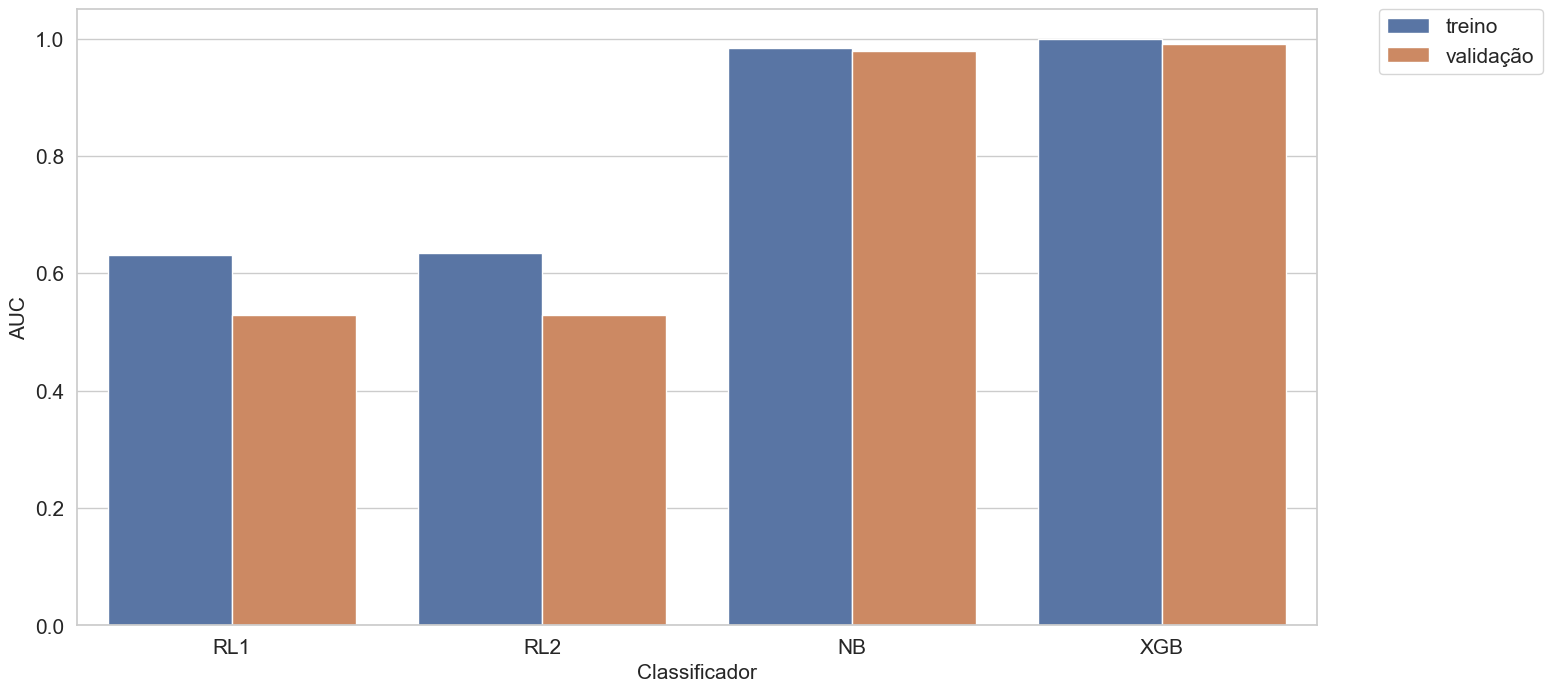

In [68]:
# Construção do Plot
sns.set_style("whitegrid")
plt.figure(figsize = (16, 8))

# Gráfico de barras
ax = sns.barplot(x = 'classificador', y = 'auc', hue = 'data_set', data = df_results)
ax.set_xlabel('Classificador', fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize = 15)

# Legenda
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0., fontsize = 15)

Nosso melhor modelo é o Classificador XGBoost, com uma AUC de validação de 99,1%.

#### 5.7: Salvando o Melhor Modelo

Escolhemos o modelo_v4 simplesmente porque ele tem a AUC de validação mais alta, pois essa é a métrica que escolhemos para avaliar os modelos.

In [69]:
# Grava o modelo em disco
pickle.dump(modelo_v4, open('modelos/melhor_modelo.pkl', 'wb'), protocol = 4)

> Vamos fazer a avaliação final do melhor modelo.

In [70]:
# Carrega o modelo, as colunas e o scaler
best_model = pickle.load(open('modelos/melhor_modelo.pkl', 'rb'))
cols_input = pickle.load(open('dados/colunas_entrada.sav', 'rb'))
scaler = pickle.load(open('dados/scaler.sav', 'rb'))

# Carrega os dados
df_train = pd.read_csv('dados/dados_treino.csv')
df_valid = pd.read_csv('dados/dados_valid.csv')
df_test = pd.read_csv('dados/dados_teste.csv')

# Cria matrizes x e y

# X
X_train = df_train[cols_input].values
X_valid = df_valid[cols_input].values
X_test = df_test[cols_input].values

# Y
y_train = df_train['LABEL_VARIAVEL_TARGET'].values
y_valid = df_valid['LABEL_VARIAVEL_TARGET'].values
y_test = df_test['LABEL_VARIAVEL_TARGET'].values

# Aplica a transformação nos dados
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)
X_test_tf = scaler.transform(X_test)

> Calculamos as previsões de probabilidades.

In [71]:
# Previsões de probabilidade
y_train_preds = best_model.predict_proba(X_train_tf)[:,1]
y_valid_preds = best_model.predict_proba(X_valid_tf)[:,1]
y_test_preds = best_model.predict_proba(X_test_tf)[:,1]

> Avaliação final.

In [73]:
thresh = 0.5

print('\nTreinamento:\n')
train_auc, train_accuracy, train_recall, train_precision, train_specificity = print_report(y_train,
                                                                                           y_train_preds, 
                                                                                           thresh)

print('\nValidação:\n')
valid_auc, valid_accuracy, valid_recall, valid_precision, valid_specificity = print_report(y_valid,
                                                                                           y_valid_preds, 
                                                                                           thresh)

print('\nTeste:\n')
test_auc, test_accuracy, test_recall, test_precision, test_specificity = print_report(y_test,
                                                                                      y_test_preds, 
                                                                                      thresh)



Treinamento:

AUC:0.999
Accuracy:0.979
Recall:1.000
Precision:0.905
Specificity:0.974
 

Validação:

AUC:0.991
Accuracy:0.958
Recall:0.935
Precision:0.869
Specificity:0.964
 

Teste:

AUC:0.994
Accuracy:0.968
Recall:0.953
Precision:0.893
Specificity:0.972
 


> Curva ROC.

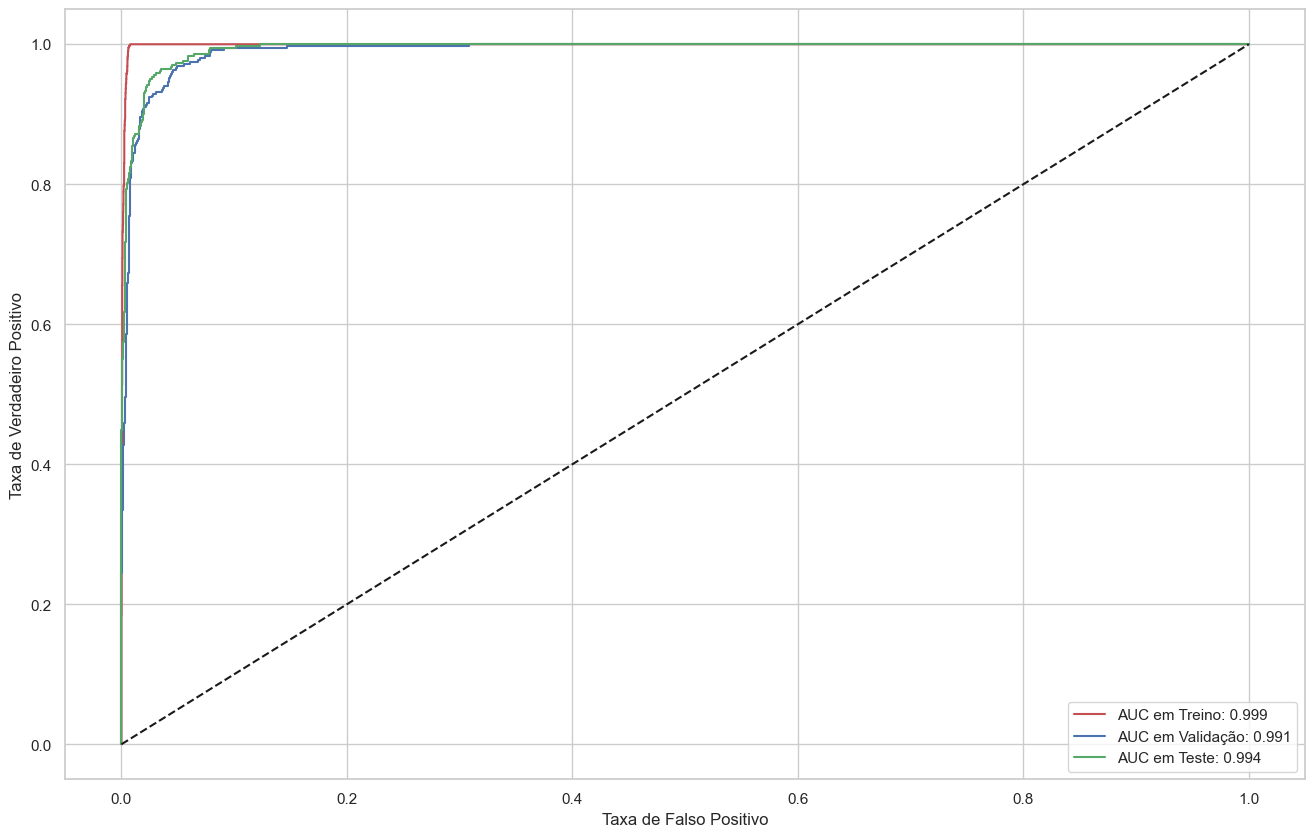

In [74]:
# Calcula a curva ROC nos dados de treino
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
auc_train = roc_auc_score(y_train, y_train_preds)

# Calcula a curva ROC nos dados de validação
fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, y_valid_preds)
auc_valid = roc_auc_score(y_valid, y_valid_preds)

# Calcula a curva ROC nos dados de teste
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_preds)
auc_test = roc_auc_score(y_test, y_test_preds)

# Plot
plt.figure(figsize=(16, 10))
plt.plot(fpr_train, tpr_train, 'r-', label = 'AUC em Treino: %.3f'%auc_train)
plt.plot(fpr_valid, tpr_valid, 'b-', label = 'AUC em Validação: %.3f'%auc_valid)
plt.plot(fpr_test, tpr_test, 'g-', label = 'AUC em Teste: %.3f'%auc_test)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.legend()
plt.show()

### Etapa 6: Deploy do Modelo

In [75]:
# Carregando dados de um novo cliente
novo_cliente = pd.read_csv('dados/novos_dados.csv')

In [76]:
novo_cliente.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
0,51,43,34,21,13,12,6,4,1,-4,...,-41,-16,2,22,33,45,56,67,69,63


In [77]:
novo_cliente_scaled = scaler.transform(novo_cliente)

In [78]:
novo_cliente_scaled

array([[ 0.25934622,  0.21779065,  0.17781068,  0.11764793,  0.07787749,
         0.06647799,  0.03707813,  0.0311074 ,  0.01759118, -0.00696293,
        -0.04709981, -0.07965346, -0.09492515, -0.09397924, -0.07478677,
        -0.06262863, -0.0581555 , -0.05971455, -0.04290264, -0.03769336,
        -0.05862443, -0.03786492, -0.01387188, -0.00407749, -0.00983303,
        -0.00629003,  0.02544726,  0.05804429,  0.09126039,  0.08767108,
         0.06985443,  0.01916526,  0.00476047, -0.01196195,  0.01163649,
         0.03595949,  0.07017224,  0.10600381,  0.11912534,  0.15174386,
         0.16172935,  0.17772855,  0.16988667,  0.1931495 ,  0.19658029,
         0.19672858,  0.18874962,  0.15071103,  0.09057043,  0.04098779,
         0.02177333, -0.03517213, -0.08892367, -0.13338167, -0.16444126,
        -0.18991715, -0.19587818, -0.19258761, -0.17804031, -0.1350451 ,
        -0.0963509 , -0.05792167, -0.02401434, -0.04264919, -0.03085574,
        -0.02076982, -0.00400242,  0.04227097,  0.0

In [79]:
best_model.predict_proba(novo_cliente_scaled)

array([[9.9995887e-01, 4.1134106e-05]], dtype=float32)

In [80]:
best_model.predict(novo_cliente_scaled)

array([0])

De acordo com os dados, esse cliente não vai comprar a extensão do seguro.

# Fim